**Grover's Algorithm for unstructured search**

C:\Users\jishn\AppData\Local\Temp\ipykernel_4580\1400024912.py:14: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  qc.mcx(control_qubits=list(range(n_data)),
C:\Users\jishn\AppData\Local\Temp\ipykernel_4580\1400024912.py:33: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  qc.mcx(control_qubits=list(

Grover's Algorithm Circuit with barriers to distinguish oracle and diffusion:


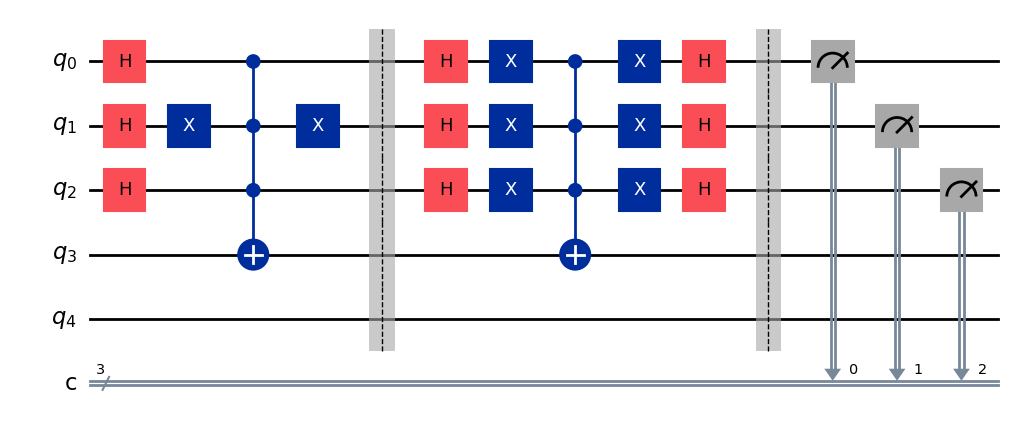


Measurement Results:


Text(0, 0.5, 'Counts')

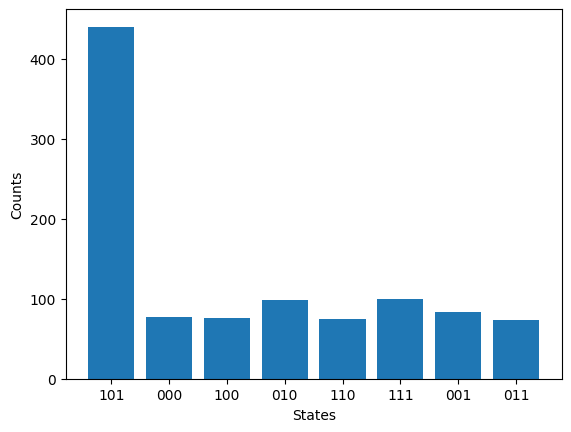

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def grover_oracle(n_data, target_state):
    n_total = n_data + 2  # data + 2 ancilla
    qc = QuantumCircuit(n_total)
    # Flip qubits for '0' bits in target_state
    for idx, bit in enumerate(target_state):
        if bit == '0':
            qc.x(idx)
    # Multi-controlled X (Toffoli) using ancilla qubits
    qc.mcx(control_qubits=list(range(n_data)),
           target_qubit=n_data,
           ancilla_qubits=[n_data+1],
           mode='recursion')
    # Uncompute the X gates
    for idx, bit in enumerate(target_state):
        if bit == '0':
            qc.x(idx)
    qc.barrier()  # Add barrier after oracle
    return qc

def grover_diffusion(n_data):
    n_total = n_data + 2
    qc = QuantumCircuit(n_total)
    # Hadamard and X
    for q in range(n_data):
        qc.h(q)
        qc.x(q)
    # Multi-controlled X (Toffoli)
    qc.mcx(control_qubits=list(range(n_data)),
           target_qubit=n_data,
           ancilla_qubits=[n_data+1],
           mode='recursion')
    # Hadamard and X again
    for q in range(n_data):
        qc.x(q)
        qc.h(q)
    qc.barrier()  # Add barrier after diffusion
    return qc

n_data = 3
target = '101' # you can change this to any target state of your choice
if len(target) != n_data:
    raise ValueError(f"Target state must be {n_data} bits long.")
n_total = n_data + 2
grover_circuit = QuantumCircuit(n_total, n_data)

# Initialize superposition
for q in range(n_data):
    grover_circuit.h(q)

# Apply Grover iteration
grover_circuit.compose(grover_oracle(n_data, target), inplace=True)
grover_circuit.compose(grover_diffusion(n_data), inplace=True)

# Measurement
grover_circuit.measure(range(n_data), range(n_data))

# Display circuit with visual separation
print("Grover's Algorithm Circuit with barriers to distinguish oracle and diffusion:")
display(grover_circuit.draw('mpl', fold=-1))

# Simulate and plot results
simulator = AerSimulator()
compiled = transpile(grover_circuit, simulator)
job = simulator.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print("\nMeasurement Results:")

plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
